<a href="https://colab.research.google.com/github/Vedasr/AIML-Course/blob/main/Speech_Processing_with_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction to Speech Processing with Python**


Notebook created by: Abdul Adhil P K


## ***What is a Speech signal? What makes it different from a normal signal?***

A speech signal is a type of audio signal, but it has some specific characteristics that make it different from other types of audio signals.

- **Non-stationarity**: Speech signals are non-stationary, meaning that their statistical properties change over time. This is because speech signals are made up of a sequence of different sounds, such as vowels, consonants, and pauses. Each of these sounds has different statistical properties. Other types of audio signals, such as music or sound effects, may be more stationary.

- **Frequency range**: Speech signals typically have a frequency range of 80 Hz to 10 kHz, although the most important part of the signal is in the range of 200 Hz to 3500 Hz. This is the frequency range of human hearing, so it is the range of frequencies that are most important for understanding speech. Other types of audio signals, such as music or sound effects, may have a wider frequency range.

- **Dynamic range**: Speech signals have a very wide dynamic range, meaning that the difference between the loudest and softest parts of the signal can be very large. This is because speech signals can vary in loudness depending on the speaker, the distance of the speaker from the microphone, and the environment in which the speech is being recorded. Other types of audio signals may have a narrower dynamic range.




## **What is Speech Processing?**

Speech processing involves the analysis, synthesis, and interpretation of speech signals. It plays a crucial role in various applications, including speech recognition, speaker identification, and emotion detection.

## **Applications of Speech Processing**

***Application of Speech Processing***
Speech processing is a field of study and technology that deals with the analysis, synthesis, and manipulation of speech signals. It has a wide range of applications across various domains. Some of them are:

***Automatic Speech Recognition (ASR):*** ASR systems convert spoken language into text. They are used in voice assistants (e.g., Siri, Alexa), transcription services, and voice command recognition.

***Text-to-Speech (TTS) Synthesis:*** TTS systems generate spoken language from text. They are used in navigation systems, audiobooks, and accessibility tools for the visually impaired.

***Speaker Recognition:*** This technology verifies or identifies individuals based on their unique vocal characteristics. It is used in security systems, access control, and forensic applications.

***Emotion Recognition:*** Speech processing can be used to detect emotions from speech, which has applications in customer service (sentiment analysis), mental health monitoring, and human-computer interaction.

***Language Identification:*** Language identification systems determine the language spoken in an audio clip. They are used in multilingual call centers, content filtering, and translation services.

***Speaker Diarization:*** This process segments an audio recording into distinct speaker segments, which is useful in transcription services, meeting analysis, and voice-controlled transcription software.

***Language Translation:*** Speech-to-speech translation systems translate spoken language from one language to another in real time, facilitating cross-lingual communication.

***Voice Assistants:*** Voice-controlled personal assistants (e.g., Siri, Google Assistant) use speech processing for understanding user commands and providing responses and actions.

These are just some examples of the many applications of speech processing technology.

In [1]:
import scipy.io
import librosa.display
import numpy as np
from IPython.display import display, Audio
import matplotlib.pyplot as plt

In [2]:
# download the audio file
! wget https://jaywalnut310.github.io/vits-demo/wavs/ms_02_gt.wav

# read the wav file
fs, wav = scipy.io.wavfile.read("/content/ms_02_gt.wav")
print(fs)
print(wav)
print(wav.shape)
print(wav.shape[0] / fs)

--2024-01-16 13:12:59--  https://jaywalnut310.github.io/vits-demo/wavs/ms_02_gt.wav
Resolving jaywalnut310.github.io (jaywalnut310.github.io)... 185.199.108.153, 185.199.109.153, 185.199.110.153, ...
Connecting to jaywalnut310.github.io (jaywalnut310.github.io)|185.199.108.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 131430 (128K) [audio/wav]
Saving to: ‘ms_02_gt.wav’

ms_02_gt.wav        100%[===================>] 128.35K  --.-KB/s    in 0.004s  

2024-01-16 13:12:59 (32.4 MB/s) - ‘ms_02_gt.wav’ saved [131430/131430]

22050
[ -63  -53  -66 ... -251 -246 -236]
(65693,)
2.9792743764172336


In [3]:
display(Audio(wav, rate=fs))

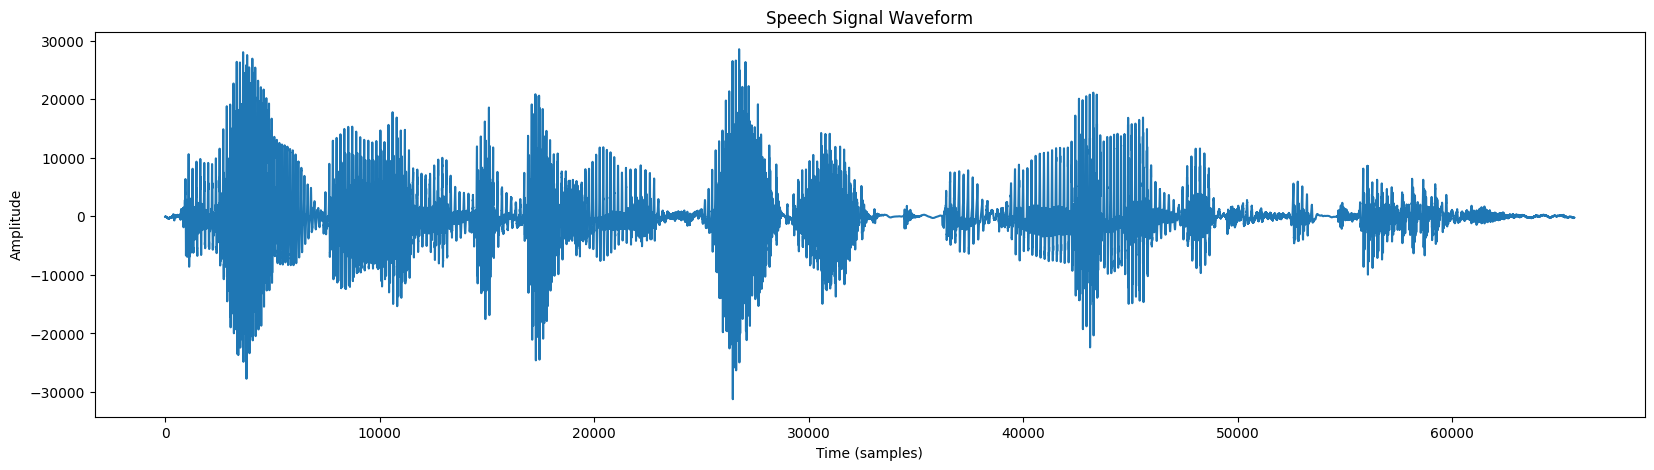

In [5]:
# Plot the waveform
plt.figure(figsize=(20, 5))
plt.plot(wav)
plt.title("Speech Signal Waveform")
plt.xlabel("Time (samples)")
plt.ylabel("Amplitude")
plt.show()

*  Now we are plotting two different segments of an audio waveform, one labeled as potentially periodic (periodic_sig) and the other as non-periodic (non_periodic_sig). The purpose might be to visually inspect and compare the characteristics of these segments, possibly as part of an analysis to distinguish between periodic and non-periodic components in the audio signal.

* **Periodic signals** in speech processing often refer to the voiced components of speech.
  Voiced speech is characterized by regular, repetitive patterns due to the vibration of the vocal cords. These vibrations produce a fundamental frequency (pitch) and harmonics.

* **Non-periodic signals** in speech processing are associated with unvoiced components and various noise sources.
Unvoiced speech segments lack the regular vibratory patterns of the vocal cords and are often characterized by more random or noisy behavior.

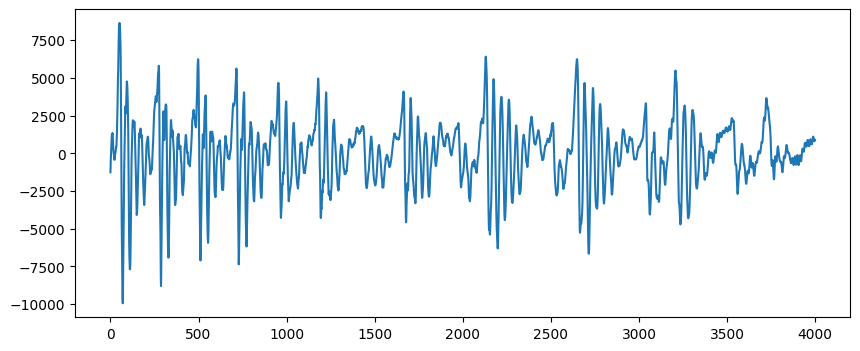

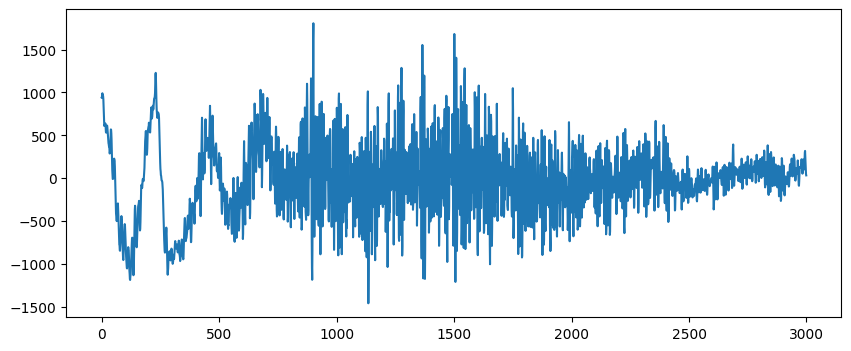

In [6]:
periodic_sig = wav[56000:60000]
non_periodic_sig = wav[60000:63000]

plt.figure(figsize=[10, 4])
plt.plot(periodic_sig)
plt.show()

plt.figure(figsize=[10, 4])
plt.plot(non_periodic_sig)
plt.show()

## **Some Feature Extraction methods:**

1. **Pre-emphasis**

  Pre-emphasis boosts the amount of energy in the high frequencies. For voiced segments like vowels, there is more energy at the lower frequencies than the higher frequencies. This is called spectral tilt which is related to the glottal source (how vocal folds produce sound). Boosting the high-frequency energy makes information in higher formants more available to the acoustic model. This improves phone detection accuracy. For humans, we start having hearing problems when we cannot hear these high-frequency sounds. Also, noise has a high frequency. In the engineering field, we use pre-emphasis to make the system less susceptible to noise introduced in the process later. For some applications, we just need to undo the boosting at the end.  
  Pre-emphasis uses a filter to boost higher frequencies. Below is the before and after signal on how the high-frequency signal is boosted.
  <img src="https://miro.medium.com/v2/resize:fit:828/format:webp/1*BgDnOWAm5X_xmKCncdgS7g.jpeg" width="600"/>




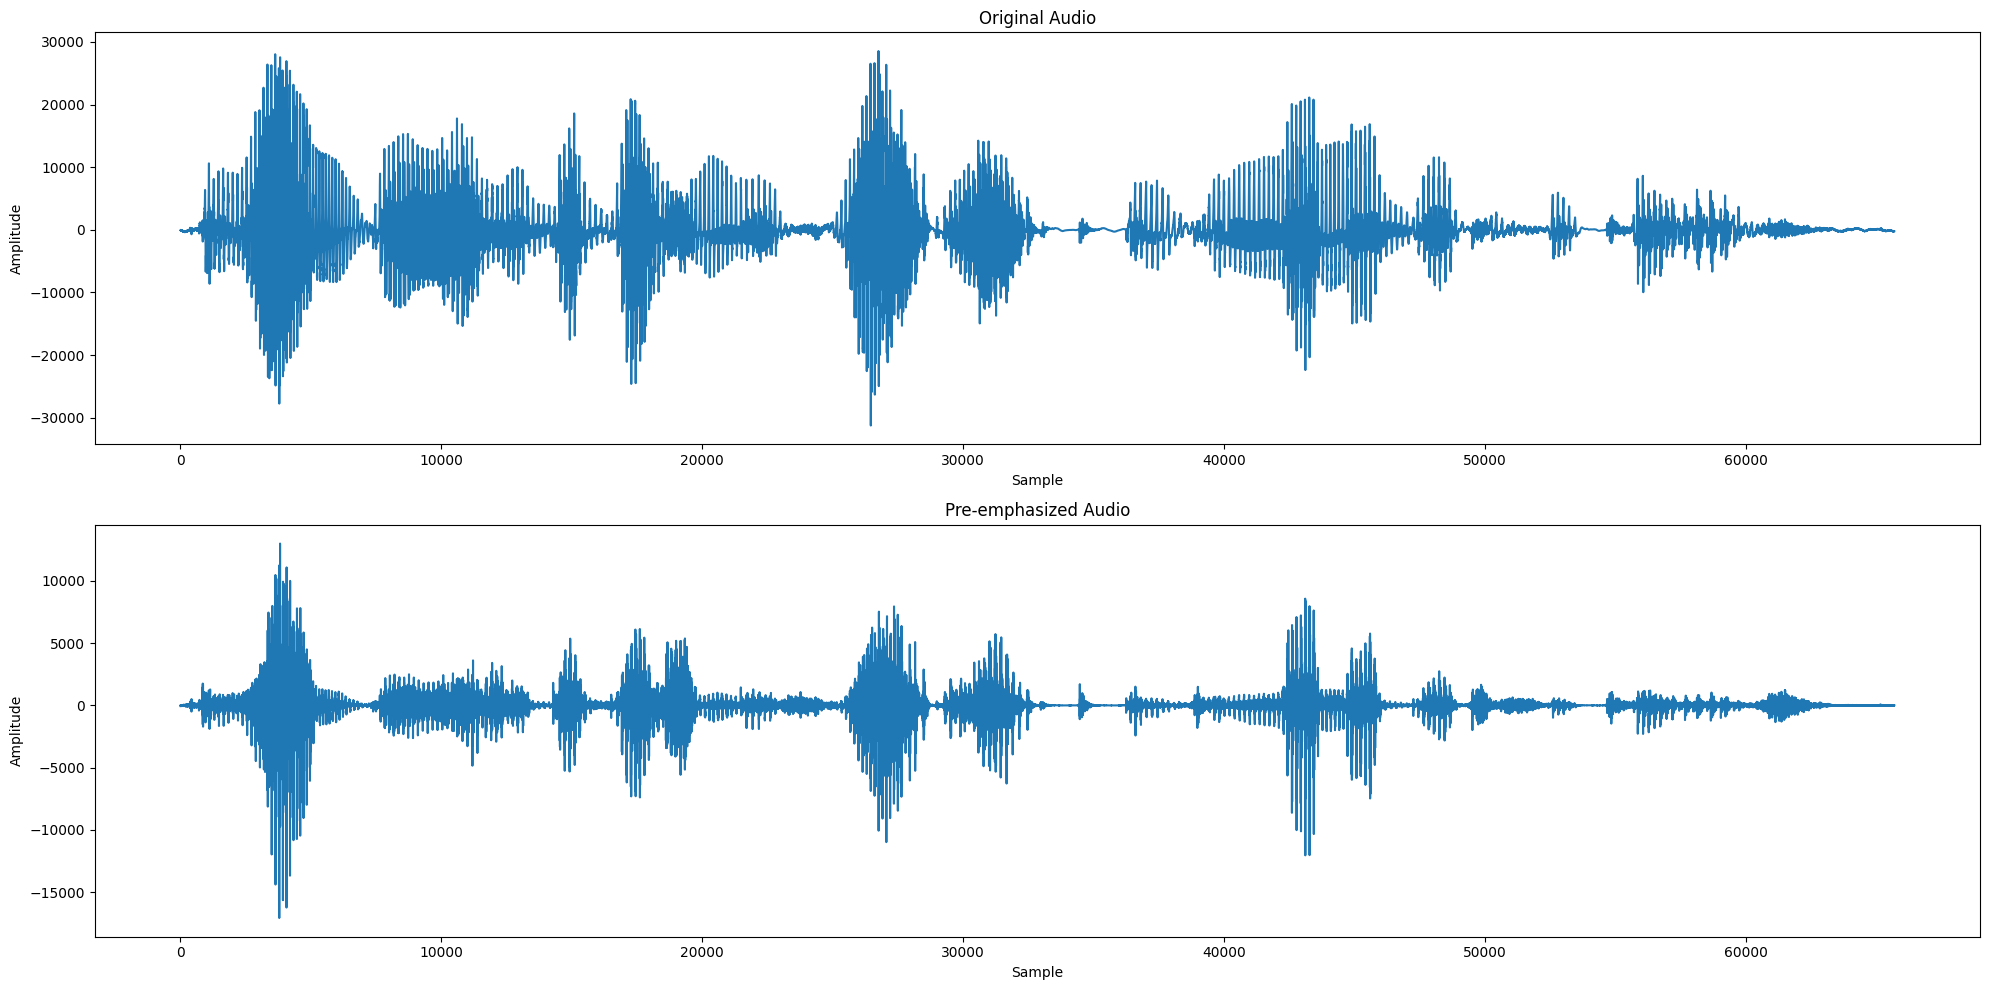

In [7]:
# apply pre-emphasis
def preemphasis(signal, alpha=0.97):
    return np.append(signal[0], signal[1:] - alpha * signal[:-1])

# Apply pre-emphasis to the waveform
wav_preemphasized = preemphasis(wav)

plt.figure(figsize=(20, 10))

plt.subplot(2, 1, 1)
plt.plot(wav)
plt.title('Original Audio')
plt.xlabel('Sample')
plt.ylabel('Amplitude')

plt.subplot(2, 1, 2)
plt.plot(wav_preemphasized)
plt.title('Pre-emphasized Audio')
plt.xlabel('Sample')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()

Try adjusting the alpha parameter in the preemphasis function to control the amount of emphasis applied. Higher values of alpha increase the emphasis on high frequencies.

2. ***Fourier Transform, DFT and FFT***

  The Fourier Transform is a mathematical formula that allows us to decompose a signal into it's individual frequencies and the frequency's amplitude. In other words, it converts the signal from the time domain into the frequency domain. The result is called a spectrum.  

  <img src="https://miro.medium.com/v2/resize:fit:1400/format:webp/1*xTYCtcx_7otHVu-uToI9dA.png" width="600"/>  

  The Fourier Transform is designed for a continous signal. As we already discussed computers can only store discrete information, so we use a modified version of FT called the Discrete Fourier Transform (DFT). Here is the DFT formula:

  <img src="https://miro.medium.com/v2/resize:fit:1400/format:webp/1*gEg1OmRy1YbnQB9kQuOL_Q.jpeg" width="600"/>  

  The Fast Fourier Transform (FFT) is an algorithm that can efficiently compute the Discrete Fourier Transform, and is the foundation of all signal processing.



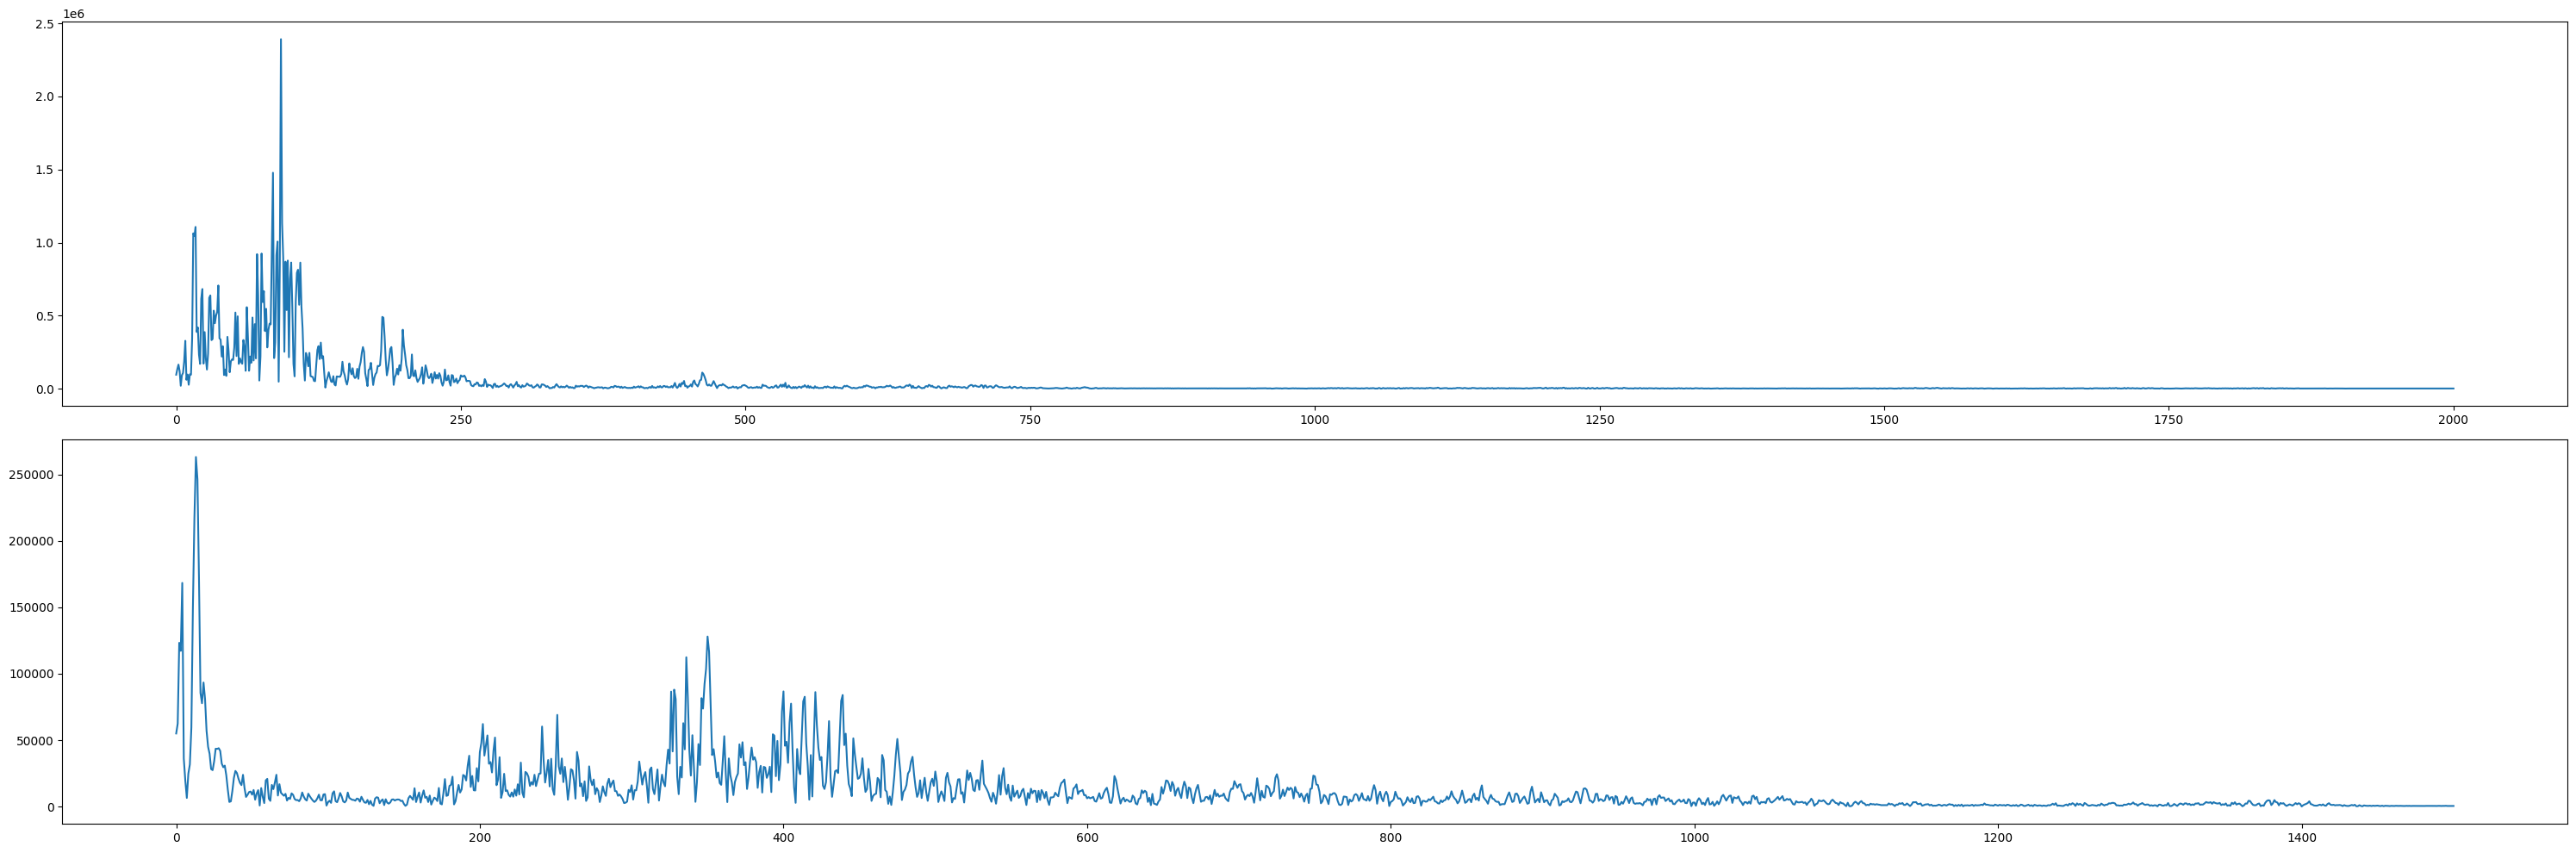

In [8]:
# performing a Fourier Transform on periodic signals and non- periodic signals

periodic_freq = np.abs(np.fft.rfft(periodic_sig))
non_periodic_freq = np.abs(np.fft.rfft(non_periodic_sig))


plt.figure(figsize=(30, 10))

plt.subplot(2, 1, 1)
plt.plot(periodic_freq)

plt.subplot(2, 1, 2)
plt.plot(non_periodic_freq)

plt.tight_layout()
plt.show()

3. **STFT and Linear Spectrogram**

  FFT is only defined for periodic signals, where as speech signal is a non periodic signal. But luckily, speech is quasi-stationary, meaning it is periodic in a small duration. Therefore we can still compute FFT for a speech signal, but we apply for small durations. We already have an operation that does this: Windowing. So if we first do windowing and then for each window if we apply FFT, we get STFT (Short Term Fourier Transform) and the output is called a Spectrogram (more specifically Linear Spectrogram).  
<img src="https://miro.medium.com/v2/resize:fit:1400/format:webp/0*r3rkXXuwvAjwZli5.png" width="600"/>
<img src="https://miro.medium.com/v2/resize:fit:828/format:webp/1*tIBRdtG3EfjmSIlraWVIxw.png" width="600"/>



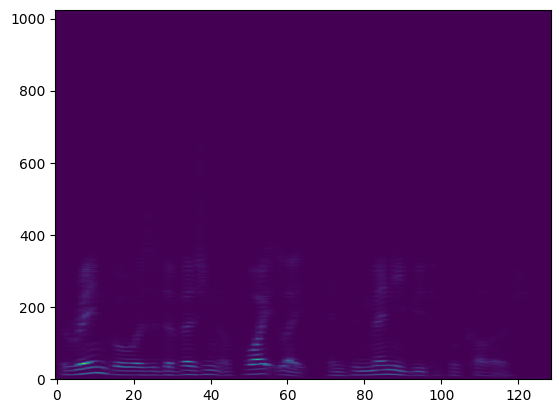

In [9]:
# visualize the spectrogram of an audio waveform using the Short-Time Fourier Transform(STFT)

import librosa

# normalizing the audio
fwav = wav / 32000

# computes the STFT of the normalized audio
spec = librosa.stft(fwav)

# plots the magnitude spectrogram of the STFT
plt.imshow(np.abs(spec), aspect='auto', origin='lower')
plt.show()


* The above code takes an audio waveform, normalizes it, computes the Short-Time Fourier Transform(STFT), calculates the magnitude spectrogram, and finally visualizes the result.


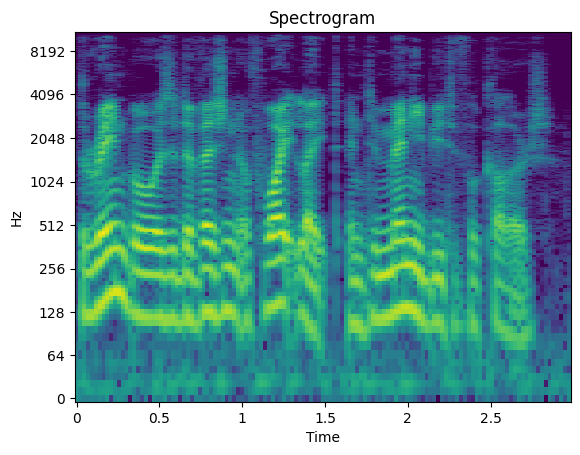

In [10]:
fwav = wav / 32000
spec = librosa.stft(fwav)

librosa.display.specshow(librosa.amplitude_to_db(np.abs(spec), ref=np.max), y_axis='log', x_axis='time', cmap='viridis')

# Show the plot
plt.title('Spectrogram')
plt.show()

 If we use librosa.display.specshow to plot a spectrogram, it uses a specific colormap and sets certain parameters that are commonly used in the field of audio signal processing. This helps in producing visually meaningful representations of audio features.

4. **Mel Scale and Spectrogram**

  Studies have shown that humans do not perceive frequencies on a linear scale. For humans, the perceived loudness changes according to frequency. We are better at detecting differences in lower frequencies than higher frequencies. For example, we can easily tell the difference between 500 and 1000 Hz, but we will hardly be able to tell a difference between 10,000 and 10,500 Hz, even though the distance between the two pairs are the same. So researchers have devised a new scale called the Mel scale which captures this.  
  <img src="https://miro.medium.com/v2/resize:fit:640/1*erUKb2-Z-Wi_u8JWel6cDQ.gif" width="200"/>  
  A mel spectrogram is a spectrogram where the frequencies are converted to the mel scale. There are algorithms that convert a linear frequency range to a mel frequency range. All these mappings are non-linear. In feature extraction, we apply triangular band-pass filters to coverts the frequency information to mimic what a human perceived.  
  <img src="https://miro.medium.com/v2/resize:fit:1400/format:webp/1*kiho3g2yqLuojsADZsQQNA.png" width="600"/>  
  <img src="https://miro.medium.com/v2/resize:fit:1400/format:webp/0*dTAxtUkRDwbmRJ3c.png" width="600"/>

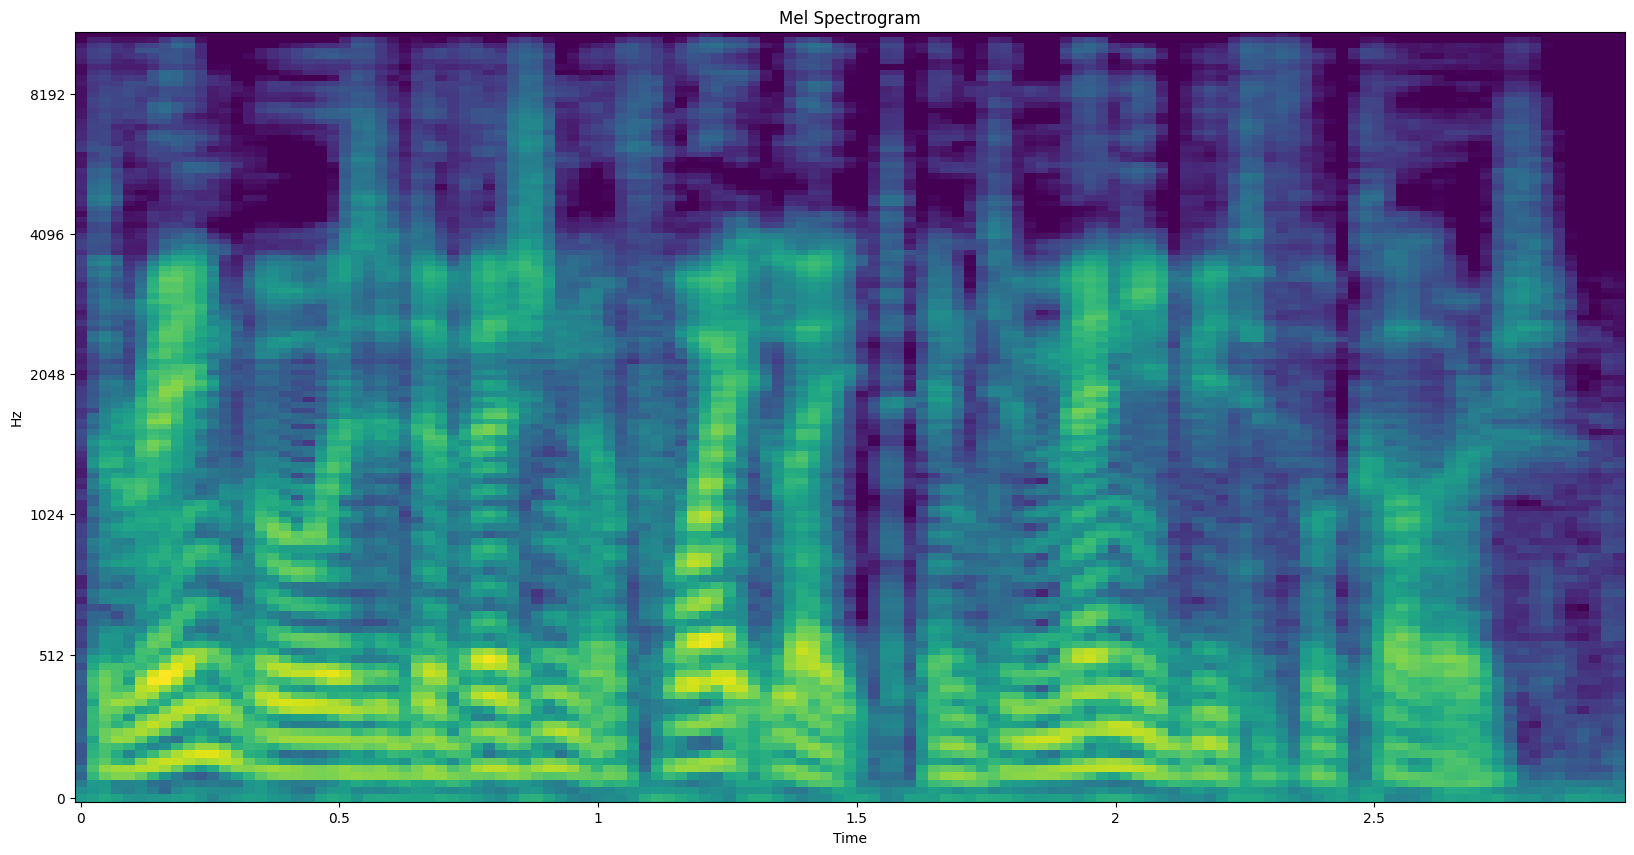

In [12]:
# convert the audio data to floating-point format
wav_float = librosa.util.normalize(wav.astype(float))

# compute the Mel spectrogram
mel_spectrogram = librosa.feature.melspectrogram(y=wav_float, sr=fs)

# convert power spectrogram to decibels(dB)
mel_spectrogram_db = librosa.power_to_db(mel_spectrogram, ref=np.max)

plt.figure(figsize=(20, 10))
librosa.display.specshow(mel_spectrogram_db, x_axis='time', y_axis='mel', sr=fs, cmap='viridis')
plt.title('Mel Spectrogram')
plt.show()

* This plot provides a visual representation of how the frequency content of the audio signal changes over time, with frequency represented on the y-axis (in Mel scale) and time on the x-axis.

* The color intensity represents the magnitude of the signal at different frequency-time points

4. ***MFCC***

  * Mel-frequency cepstral coefficients (MFCCs) are used to represent the spectral characteristics of sound.
  
  * MFCCs, which are widely used features in various machine learning tasks, such as speech recognition and music analysis.

  * MFCCs are derived from the Mel spectrogram, capturing the characteristics of the human auditory system's response to different frequencies.

  * The MFCC extraction process consists of the following steps: Pre-emphasis, Framing, Windowing, FFT, Mel-frequency filtering, Logarithm, DCT.


  <img src="https://miro.medium.com/v2/resize:fit:1400/format:webp/1*3hfXwbKUCfDITmDQtI1H5A.jpeg" width="600"/>  

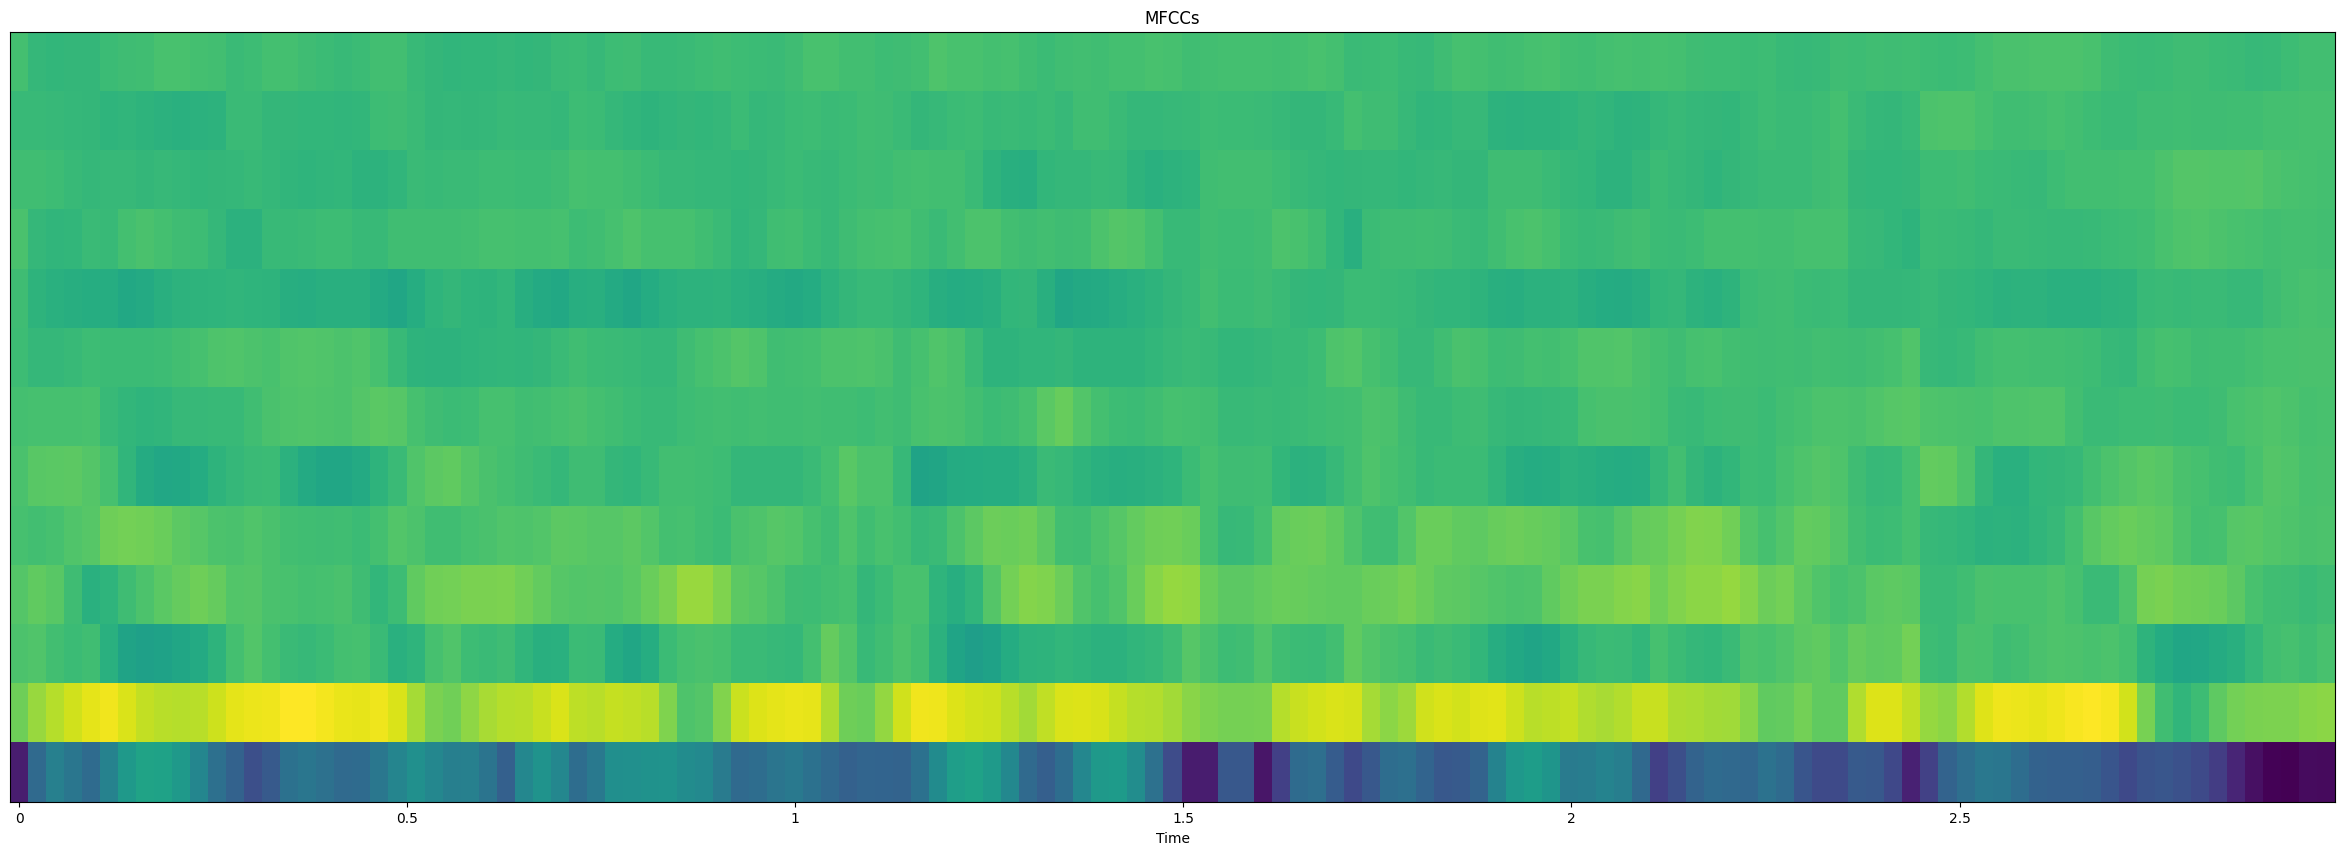

In [13]:
# Compute MFCCs
mfccs = librosa.feature.mfcc(y=wav_float, sr=fs, n_mfcc=13)

plt.figure(figsize=(30, 10))
librosa.display.specshow(mfccs, x_axis='time', sr=fs, cmap='viridis')
plt.title('MFCCs')
plt.show()

* 'n_mfcc' refers to the number of MFCCs to be computed
    
* It determines how many coefficients will be calculated and included in the final feature vector.

* Higher values of 'n_mfcc' can capture more detailed information about the spectral characteristics of the audio signal, but may also lead to higher-dimensional feature vectors

Materials for referance:

1. https://jonathan-hui.medium.com/speech-recognition-feature-extraction-mfcc-plp-5455f5a69dd9

2. https://www.inf.ed.ac.uk/teaching/courses/asr/2018-19/asr02-signal-handout.pdf